<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
# Install Seaborn
!pip install seaborn

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [29]:
from pyodide.http import pyfetch
async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

ModuleNotFoundError: No module named 'pyodide'

In [19]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [17]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

NameError: name 'download' is not defined

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [23]:
df = pd.read_csv(file_name)

NameError: name 'file_name' is not defined

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [35]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


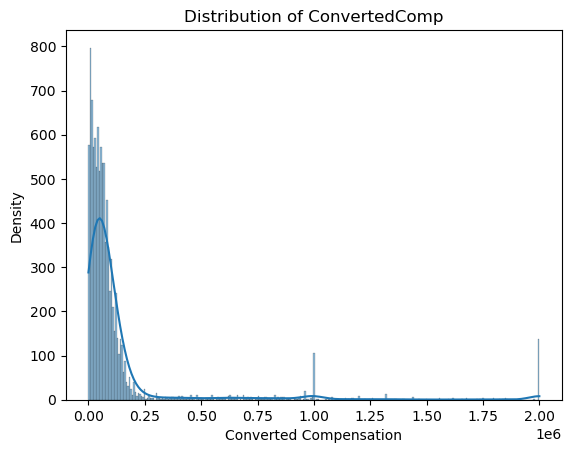

In [37]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' with a column 'ConvertedComp'
sns.histplot(data=df['ConvertedComp'], kde=True)
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.show() 

Plot the histogram for the column `ConvertedComp`.


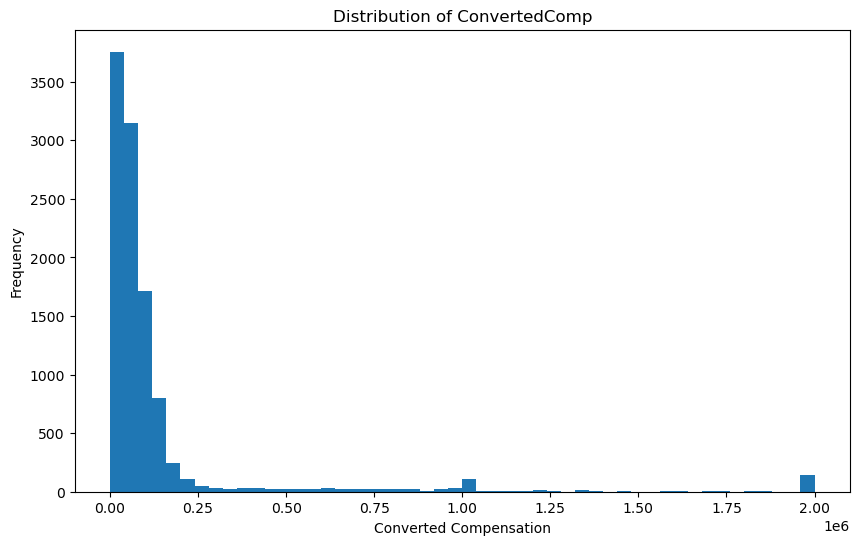

In [39]:
# your code goes here
df['ConvertedComp'].plot.hist(bins=50, figsize=(10, 6))
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [41]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()

print("Median Converted Compensation:", median_converted_comp)

Median Converted Compensation: 57745.0


How many responders identified themselves only as a **Man**?


In [43]:
# your code goes here
num_men = df['Gender'].value_counts()['Man']
print("Number of responders identifying as only 'Man':", num_men)

Number of responders identifying as only 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [45]:
# your code goes here
df_women = df[df['Gender'] == 'Woman']

median_converted_comp_women = df_women['ConvertedComp'].median()

print("Median Converted Compensation for Women:", median_converted_comp_women)

Median Converted Compensation for Women: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [47]:
# your code goes here
five_number_summary = df['Age'].describe()

print(five_number_summary)

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


In [ ]:
# your code goes here


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


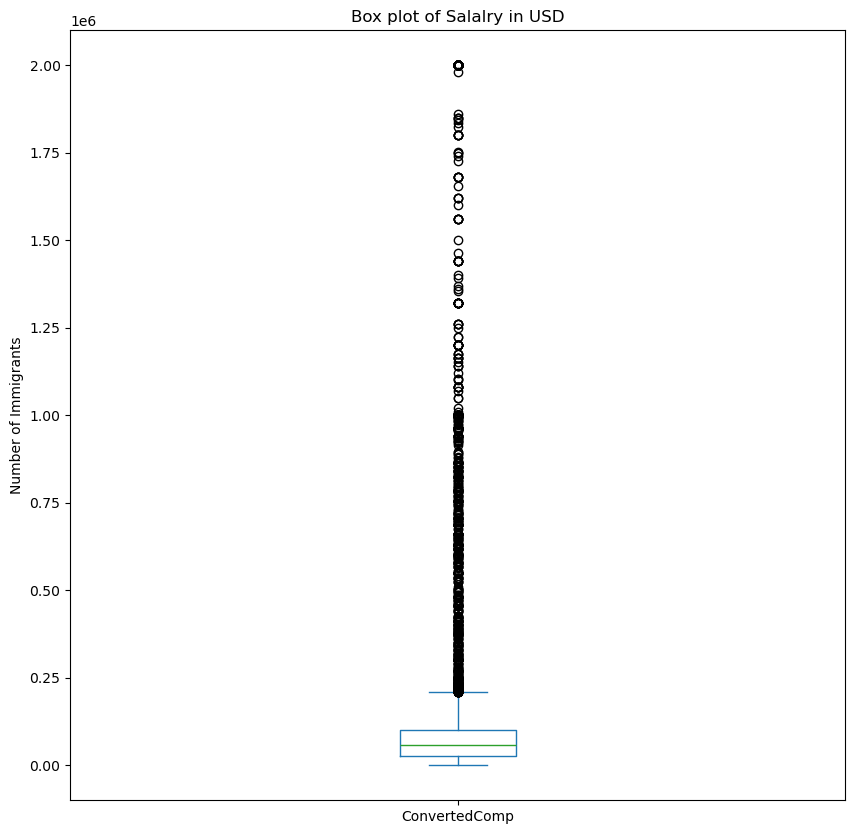

In [57]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(10,10))

plt.title('Box plot of Salalry in USD')
plt.ylabel('Number of Immigrants')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [51]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range for ConvertedComp:", IQR)


Interquartile Range for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [61]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("Upper bound:", upper_bound)
print("Lower bound:", lower_bound)

Upper bound: 209698.0
Lower bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [65]:
# your code goes here
# your code goes here
((df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))).sum() 


879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [78]:
# your code goes here
mask = (df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))
df[mask] = np.nan
df['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [112]:
# your code goes here
correlation_matrix = df.corr()

# Get the correlation coefficients between 'Age' and all other numerical columns
correlation_with_age = correlation_matrix['Age']

print(correlation_with_age)

52000.0


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
